In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
169412,169413,Female,73,1,28.0,0,1-2 Year,Yes,29144.0,122.0,179,0
205220,205221,Female,25,1,15.0,0,< 1 Year,Yes,21558.0,152.0,72,0
129077,129078,Female,46,1,28.0,0,1-2 Year,No,49397.0,124.0,281,0
99475,99476,Female,37,1,28.0,1,1-2 Year,No,33115.0,26.0,203,0
290081,290082,Male,29,1,3.0,1,< 1 Year,No,2630.0,160.0,65,0


In [4]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
test.sample(5) 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
21245,402355,Female,59,1,28.0,0,> 2 Years,Yes,43465.0,13.0,276
85638,466748,Male,54,1,28.0,0,1-2 Year,No,30628.0,26.0,244
49043,430153,Male,33,1,11.0,0,< 1 Year,Yes,2630.0,156.0,70
20007,401117,Male,45,1,8.0,0,1-2 Year,No,39154.0,124.0,209
55233,436343,Male,45,1,28.0,1,1-2 Year,No,37038.0,61.0,185


In [6]:
train.shape

(381109, 12)

In [7]:
test.shape

(127037, 11)

## Checking if any values are missing in train data set

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### No missing values in train data set

## Numerical Description of the datasets

In [9]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
numerical = ['Age', 'Previously_Insured', 'Annual_Premium', 'Vintage']

In [11]:
train[numerical].describe()

,Age,Previously_Insured,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.458210,30564.389581,154.347397
std,15.511611,0.498251,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,0.000000,24405.000000,82.000000
50%,36.000000,0.000000,31669.000000,154.000000
75%,49.000000,1.000000,39400.000000,227.000000
max,85.000000,1.000000,540165.000000,299.000000


### Count Plot of Responses

Response being they have taken vehicle insurance or not

0 - Did not buy vehicle insurance \
1 - Bought vehicle insurance

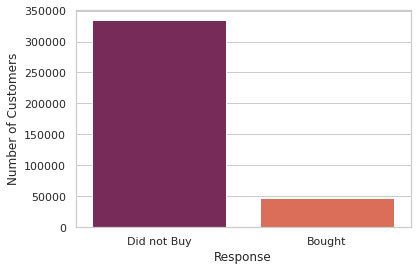

In [12]:
countPlot = sns.countplot(train['Response'], palette="rocket")
countPlot.set_ylabel('Number of Customers')
countPlot.set_xticklabels(['Did not Buy', 'Bought'], rotation=0 )
plt.show(countPlot)

In [13]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Distribution Plot of Ages of Customers

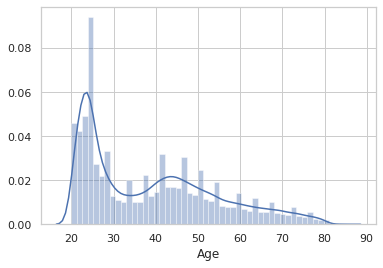

In [14]:
cnp1=sns.distplot(train['Age'])
plt.show(cnp1)
# y axis - probability of age
# x axis - age

### Finding outliers by Age

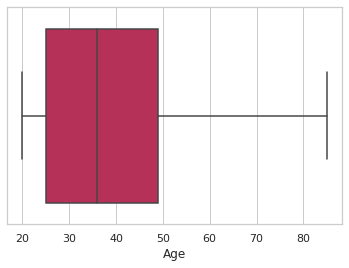

In [15]:
cnp2 = sns.boxplot(x='Age', data=train, palette="rocket")
plt.show(cnp2)

## Comparing Age with Annual Premium

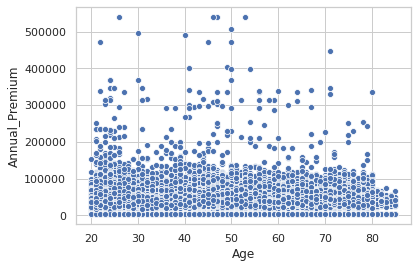

In [16]:
cnp3=sns.scatterplot(x=train['Age'], y=train['Annual_Premium'], palette="rocket")
plt.show(cnp3)

## Comparision By Gender

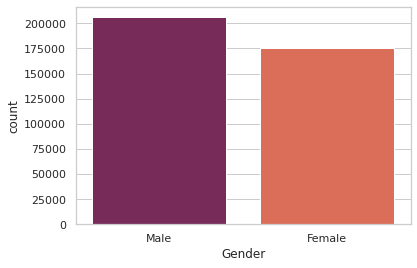

In [17]:
sns.countplot(train['Gender'], palette = "rocket")

In [18]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

We have a slightly higher number of males than females in our training dataset

## Comparing their Responses (Responses based on Gender)

In [19]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

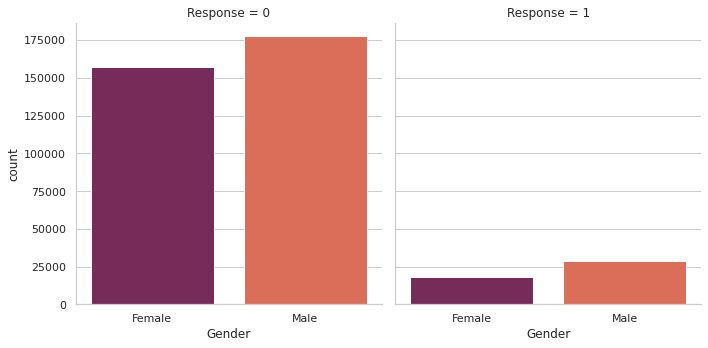

In [20]:
g = sns.catplot(x="Gender", y="count",col="Response",data=df, kind="bar", palette="rocket");

## Comparing Driving licenses by Gender

In [21]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [22]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


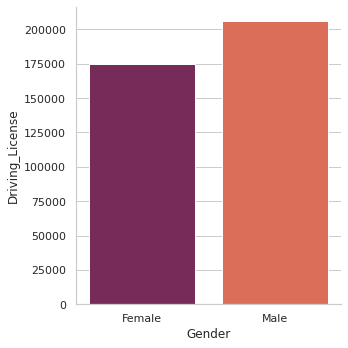

In [23]:
sns.catplot(x="Gender", y="Driving_License", data=df, kind="bar", palette="rocket");

## Customers who already have vehicle insurance

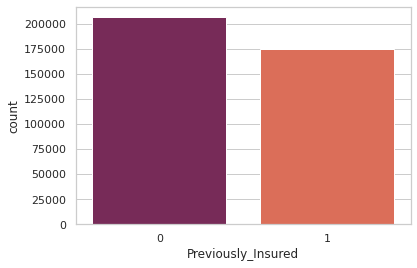

In [24]:
cnp4=sns.countplot(train.Previously_Insured, palette="rocket")
plt.show(cnp4)

## Age of the Vehicle

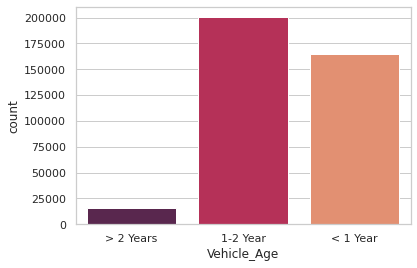

In [25]:
cnp5=sns.countplot(train.Vehicle_Age, palette="rocket")
plt.show(cnp5)

## Response with respect to vehicle age

#### Label Encoding

In [44]:
train.loc[train['Gender'] == 'Male', 'Gender'] = 1
train.loc[train['Gender'] == 'Female', 'Gender'] = 0
test.loc[test['Gender'] == 'Male', 'Gender'] = 1
test.loc[test['Gender'] == 'Female', 'Gender'] = 0

train.loc[train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train.loc[train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train.loc[train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
test.loc[test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test.loc[test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test.loc[test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

train.loc[train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train.loc[train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test.loc[test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test.loc[test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [27]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
256169,256170,1,38,1,41.0,1,1,0,28517.0,124.0,132,0
161989,161990,1,48,1,41.0,0,1,1,38459.0,26.0,61,0
64590,64591,0,79,1,8.0,0,1,1,2630.0,124.0,110,0
344640,344641,1,46,1,28.0,0,1,1,32510.0,26.0,128,1
360566,360567,1,41,1,8.0,1,1,0,45142.0,124.0,201,0


In [28]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,0,0,157584
1,0,1,7202
2,1,0,165510
3,1,1,34806
4,2,0,11305
5,2,1,4702


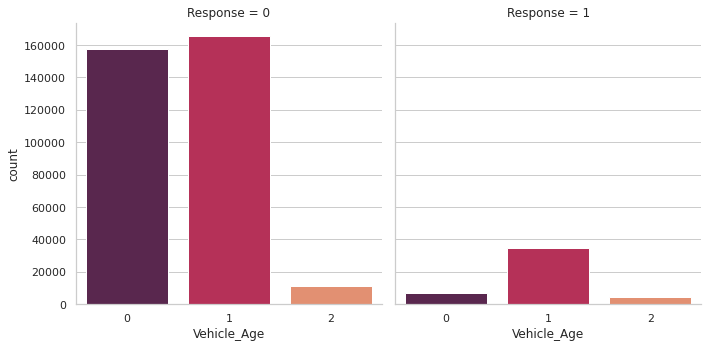

In [29]:
cnp10=sns.catplot(x="Vehicle_Age", y="count",col="Response",data=df, kind="bar", palette="rocket");

plt.show(cnp10);

## Number of vehicles damaged

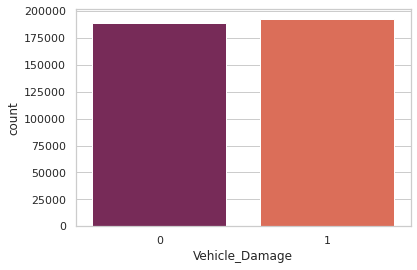

In [30]:
cnp6=sns.countplot(train.Vehicle_Damage, palette="rocket")
plt.show(cnp6)

## Response with respect to vehicle damage

In [31]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,0,0,187714
1,0,1,982
2,1,0,146685
3,1,1,45728


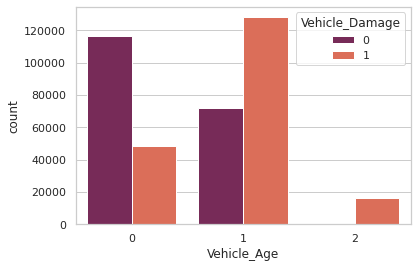

In [32]:
cnp7=sns.countplot('Vehicle_Age',hue='Vehicle_Damage',data=train, palette="rocket")
plt.show(cnp7)

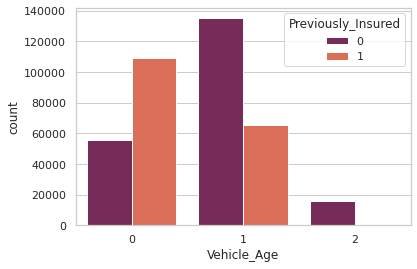

In [33]:
cnp8=sns.countplot('Vehicle_Age',hue='Previously_Insured',data=train, palette="rocket")
plt.show(cnp8)

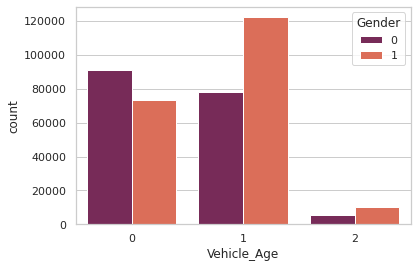

In [34]:
cnp9=sns.countplot('Vehicle_Age',hue='Gender',data=train, palette="rocket")
plt.show(cnp9)

## Correlation Matrix

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Driving_License'),
 Text(3.5, 0, 'Region_Code'),
 Text(4.5, 0, 'Previously_Insured'),
 Text(5.5, 0, 'Annual_Premium'),
 Text(6.5, 0, 'Policy_Sales_Channel'),
 Text(7.5, 0, 'Vintage'),
 Text(8.5, 0, 'Response')]

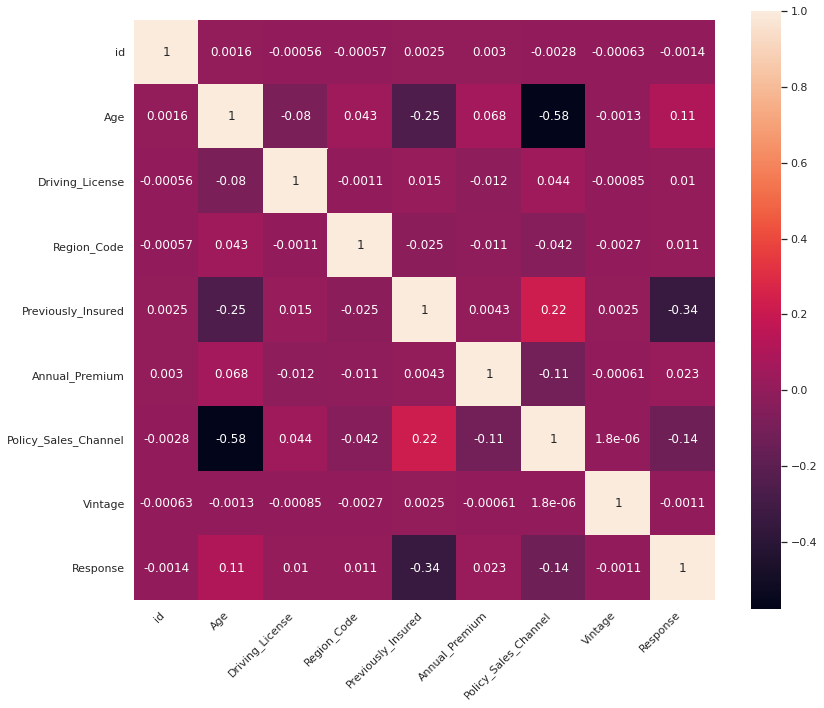

In [48]:
plt.figure(figsize=(13,11))
corr = train.corr()
ax = sns.heatmap(
    corr,
    square=True,
    cmap="rocket",
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


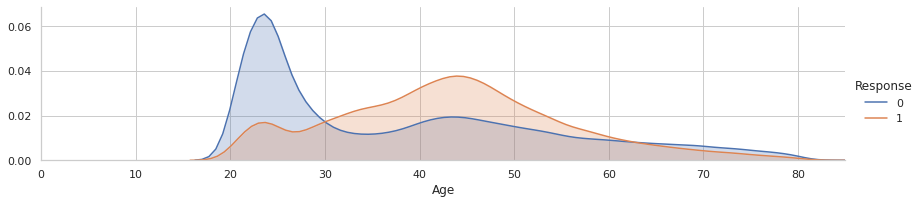

In [47]:
facet = sns.FacetGrid(train,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Age",shade = True)
facet.set(xlim = (0,train["Age"].max()))
facet.add_legend()
plt.show()

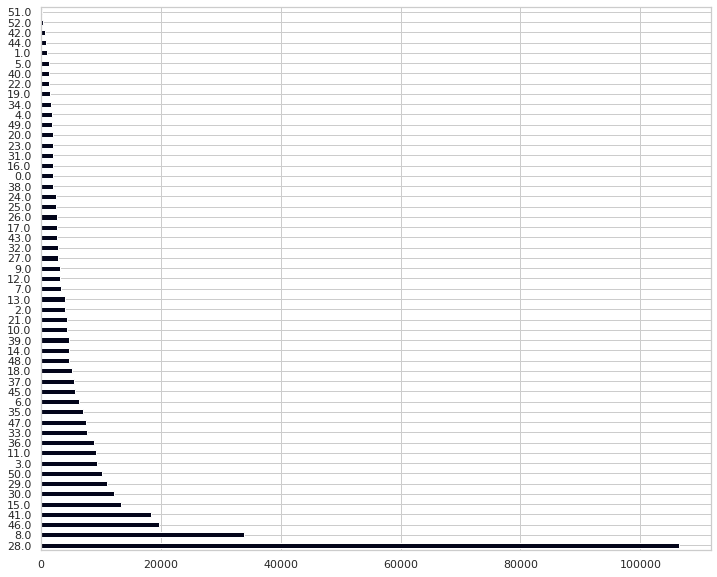

In [51]:
train['Region_Code'].value_counts().plot(kind='barh',cmap='rocket',figsize=(12,10));

Not reliable

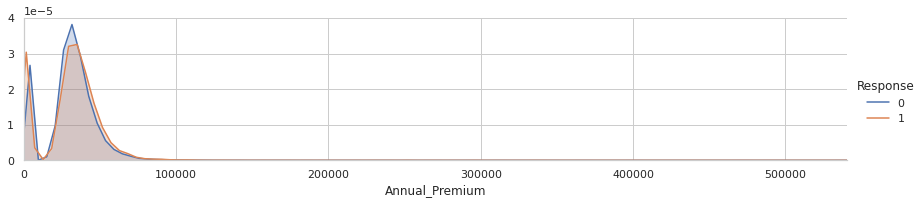

In [53]:
facet = sns.FacetGrid(train,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Annual_Premium",shade = True)
facet.set(xlim = (0,train["Annual_Premium"].max()))
facet.add_legend()
plt.show()

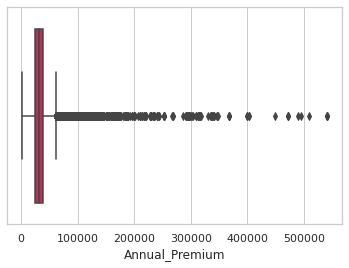

In [55]:
cnp2 = sns.boxplot(x='Annual_Premium', data=train, palette="rocket")
plt.show(cnp2)

So, the above data doesn't tell us much about it!
Because of excessive outliers

In [1]:
train['Annual_Premium'].min()

NameError: name 'train' is not defined

## Finding Most Important Columns

In [69]:
x = train.drop(["Response", "id", "Region_Code"], axis=1)
y = train["Response"]

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [71]:
# plt.figure(figsize=(8,6))
important_features = pd.Series(model.feature_importances_,index = x.columns)
# important_features.nlargest(7).plot(kind = "bar")
# plt.show()
important_features

Gender                  0.003194
Age                     0.123917
Driving_License         0.000410
Previously_Insured      0.059471
Vehicle_Age             0.017197
Vehicle_Damage          0.072725
Annual_Premium          0.315171
Policy_Sales_Channel    0.068941
Vintage                 0.338974
dtype: float64

- Classification Models - comparision
- 